In [3]:
import os
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def bar(orientation,data,title,color,labels):
    plt.figure(figsize = (15, 10))
    if orientation == 'horizontal': 
        plt.barh(data[0],data[1],color=color)
    else: 
        plt.bar(data[0],data[1],color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(labels[0], fontsize=15)
    plt.xticks(fontsize=12)
    plt.ylabel(labels[1], fontsize=15)
    plt.yticks(fontsize=10)
    plt.show()


def wordcloud(counts, title): 
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title,fontsize=18)
    plt.show()

In [1]:
from bibleMarginalia import *
from getTexts import * 
# EP: /Users/amycweng/Digital Humanities/eebotcp/texts
# TCP: /Users/amycweng/Digital Humanities/TCP 

csv_data = pd.read_csv('/Users/amycweng/Digital Humanities/sermons.csv')
tcpIDs = [ _ for _ in csv_data['id']]

all_specials = []
for idx, tcpID in enumerate(tcpIDs): 
    path = findTextTCP(tcpID)
    notes, specials = getMarginalia(path)
    for case in specials: 
        all_specials.append(case.split(' ')[0])
    with open(f'/Users/amycweng/Digital Humanities/charityMargin/{tcpID}NOTES.txt','w') as file: 
        for note in notes[0]: 
            file.write(f'{note}\n')
    if len(notes[1]) > 0: 
        print(f'Outlier formatting for {tcpID}: ', notes[1])
    if (idx+1) % 10 == 0 and idx != 0: 
        print(f'Processed {idx+1} files.')
print('Possibly missing abbreviations: ', Counter(all_specials))

Processed 10 files.
Processed 20 files.
Processed 30 files.
Processed 40 files.
Processed 50 files.
Processed 60 files.
Processed 70 files.
Possibly missing abbreviations:  Counter({'c': 33, 'l': 28, 'sirac': 28, 'chap': 25, 'cap': 17, 'thyest': 14, 'fur': 13, 'trist': 12, 'io': 9, 'pont': 9, 'part': 9, 'capt': 8, 'agam': 8, 'ibid': 8, 'ose': 8, 'vers': 7, 'wisd': 6, 'amor': 6, 'trinum': 6, 'exerc': 6, 'thy': 6, 'ma': 5, 'art': 5, 'amph': 5, 'sal': 4, 'tom': 4, 'heaut': 4, 'sa': 4, 'adelph': 4, 'cum': 4, 'lib': 4, 'med': 4, 'thren': 4, 'a': 3, 'm': 3, 'q': 3, 'sai': 3, 'stich': 3, 'controv': 3, 'mostell': 3, 'cro': 3, 'v': 3, 'octav': 3, 'reg': 3, 'serm': 3, 'timo': 3, 'troad': 3, 'verse': 3, 'esal': 2, 'pers': 2, 'pseud': 2, 'apc': 2, 'n': 2, 'dut': 2, 'in': 2, 'irem': 2, 'ibn': 2, 'ot': 2, 't': 2, 'trucul': 2, 'eun': 2, 'hippol': 2, 'point': 2, 'ponto': 2, 'rud': 2, 'tibull': 2, 'var': 2, 'obser': 2, 'hosca': 2, 'micha': 2, 'say': 2, 'paris': 2, 'amphitr': 2, 'car': 2, 'curcul': 2, '

In [2]:
from charity_citations import * 

all_notes = []
all_books = []
all_chapters = []
charity_margin = {}
all_margin = {}

folder = '/Users/amycweng/Digital Humanities/charityMargin'
for notesfile in os.listdir(folder): 
    tcpID = notesfile.split('NOTES')[0]
    charity_margin[tcpID] = []

    notesfile = open(f'{folder}/{notesfile}','r')
    notes = [note.strip('\n') for note in notesfile.readlines()]
    notesfile.close()

    all_notes.extend(notes)
    all_margin[tcpID] = notes
    for n in notes:             
        if n in bible_charity: 
            charity_margin[tcpID].append(n)
        book = n.split(' ')
        if book[0] == '1' or book[0] == '2': 
            all_books.append(f'{book[0]} {book[1]}')
            chapter = book[2].split(':')[0]
            all_chapters.append(f'{book[0]} {book[1]} {chapter}')
        else: 
            all_books.append(book[0])
            chapter = book[1].split(':')[0]
            all_chapters.append(f'{book[0]} {chapter}')

In [4]:
charity_citations_file = open(f'marginalia.charity.sermons.txt','w')
all_citations_file = open(f'marginalia.all.sermons.txt','w')
for tcpID, margin in charity_margin.items(): 
    charity_citations_file.write(f'{tcpID} -- {"; ".join(margin)}\n')
    all_citations_file.write(f'{tcpID} -- {"; ".join(all_margin[tcpID])}\n')
charity_citations_file.close()
all_citations_file.close()

[('Psalms', 2442), ('Matthew', 1114), ('Romans', 795), ('Isaiah', 731), ('Genesis', 697), ('Proverbs', 623), ('Luke', 597), ('1 Corinthians', 516), ('John', 513), ('Hebrews', 450), ('Jeremiah', 442), ('Acts', 442), ('2 Corinthians', 432), ('Job', 380), ('Ephesians', 340), ('2 Samuel', 286), ('Deuteronomy', 273), ('James', 259), ('Ecclesiastes', 240), ('1 John', 239), ('Exodus', 231), ('1 Samuel', 228), ('Apocrypha', 224), ('1 Peter', 223), ('1 Kings', 216)]


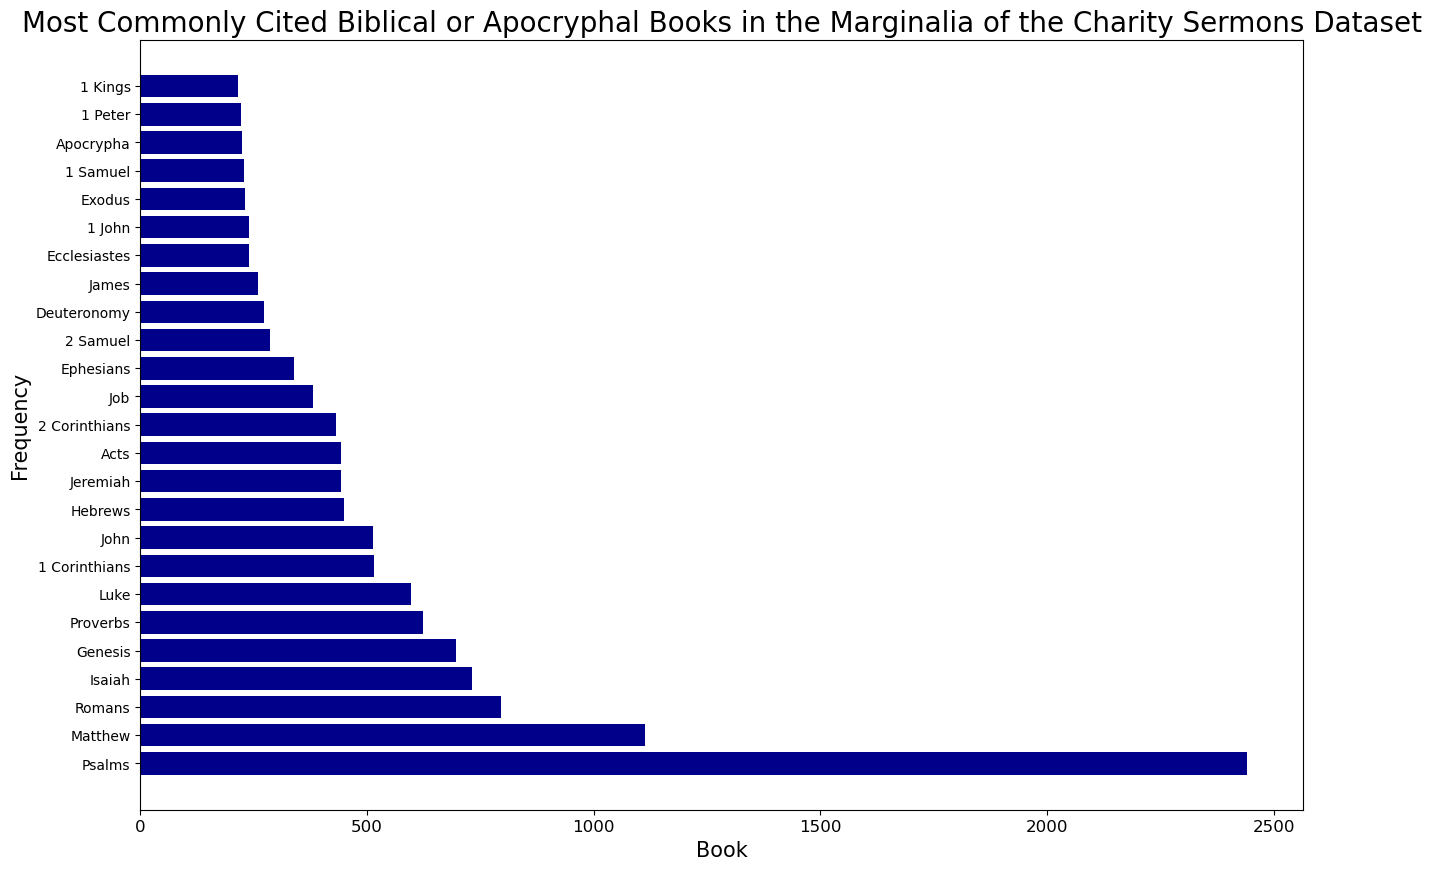

In [5]:
book_counts = Counter(all_books).most_common(n=25)
print(book_counts)
x,y = [],[]
for word,freq in book_counts: 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Most Commonly Cited Biblical or Apocryphal Books in the Marginalia of the Charity Sermons Dataset','darkblue',('Book','Frequency'))

[('Psalms 119', 224), ('Romans 8', 163), ('Matthew 5', 120), ('Psalms 44', 118), ('James 1', 105), ('Matthew 26', 103), ('Matthew 6', 99), ('Romans 5', 93), ('1 John 3', 91), ('Philippians 3', 88), ('Hebrews 12', 86), ('2 Corinthians 5', 84), ('Ephesians 4', 80), ('Ephesians 5', 76), ('1 Peter 1', 76), ('Romans 7', 75), ('Romans 6', 74), ('1 Thessalonians 5', 73), ('Hebrews 11', 70), ('Lamentations 3', 70), ('1 Corinthians 15', 69), ('Psalms 51', 69), ('Genesis 3', 68), ('Matthew 13', 66), ('Hebrews 13', 66)]


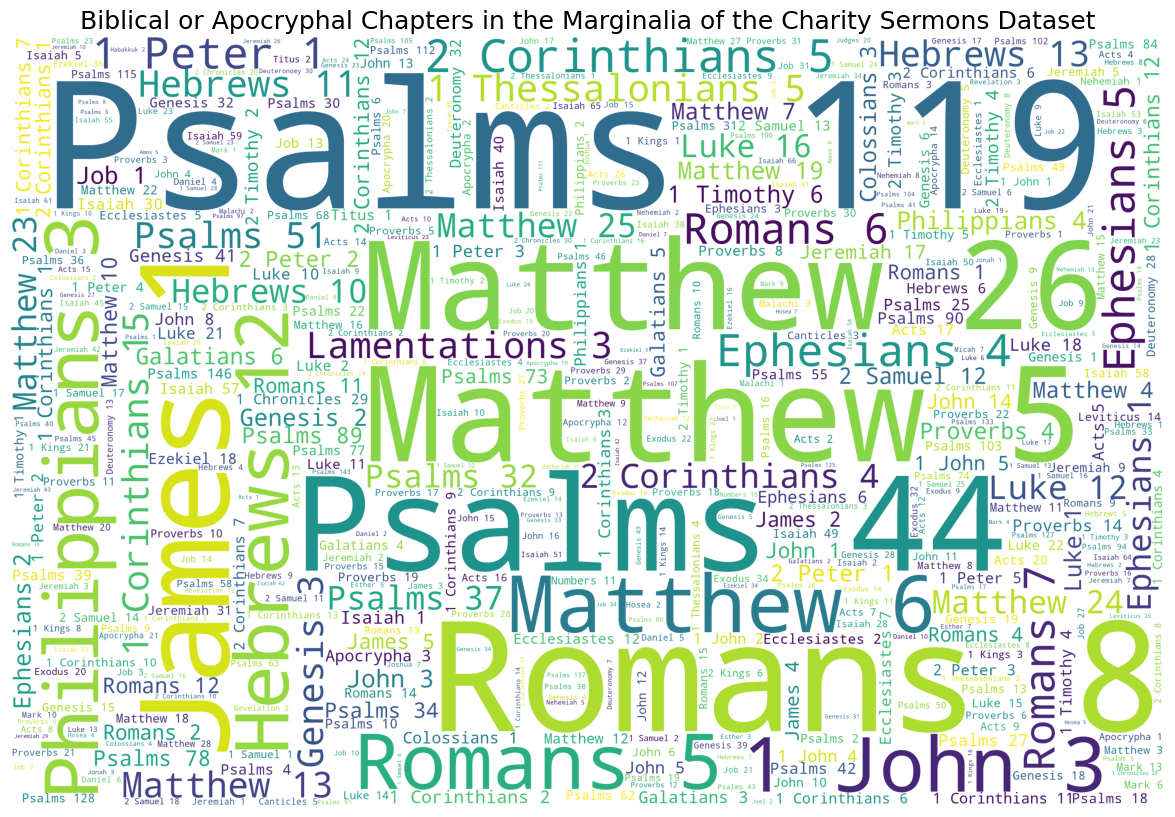

In [6]:
chapter_counts = Counter(all_chapters)
print(chapter_counts.most_common(n=25))
wordcloud(chapter_counts,'Biblical or Apocryphal Chapters in the Marginalia of the Charity Sermons Dataset')

[('James 1:17', 20), ('Romans 5:3', 18), ('Apocrypha 20:6', 18), ('Hebrews 13:5', 18), ('1 Peter 5:8', 18), ('Job 13:15', 18), ('Romans 14:17', 17), ('Matthew 26:41', 16), ('Jeremiah 17:9', 15), ('Philippians 3:8', 15), ('Genesis 2:7', 15), ('Romans 5:5', 15), ('Genesis 2:18', 15), ('John 3:16', 14), ('Hebrews 11:1', 14), ('Hebrews 12:6', 14), ('1 Timothy 5:8', 14), ('Matthew 6:32', 14), ('Matthew 19:6', 14), ('Psalms 4:6', 14), ('Romans 7:24', 14), ('2 Corinthians 4:4', 13), ('1 John 3:2', 13), ('Acts 15:9', 13), ('Philippians 4:6', 13)]


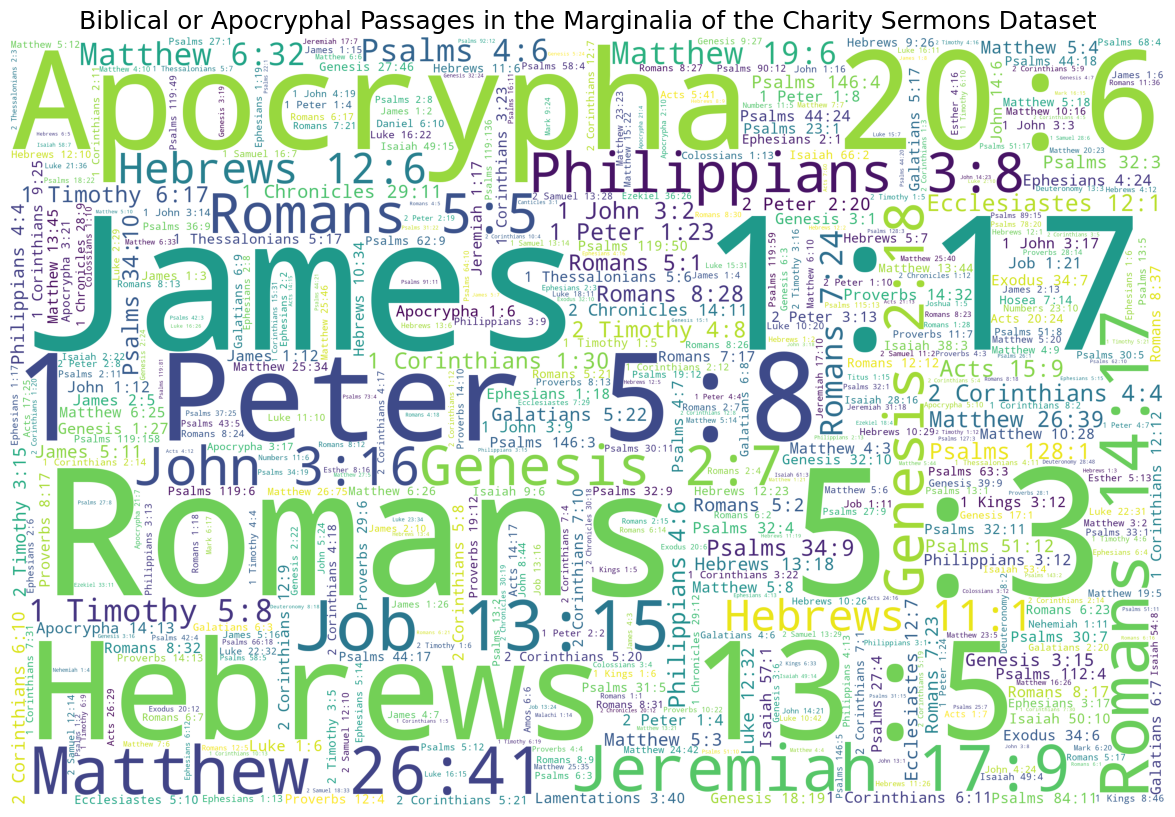

In [7]:
passage_counts = Counter(all_notes)
print(passage_counts.most_common(n=25))
wordcloud(passage_counts,'Biblical or Apocryphal Passages in the Marginalia of the Charity Sermons Dataset')

In [8]:
newTestament = ['Matthew', 'Mark', 'Luke', 'John','Acts','Romans','1 Corinthians','2 Corinthians','Galatians','Ephesians','Philippians','Colossians','1 Thessalonians','2 Thessalonians','1 Timothy','2 Timothy','Titus','Philemon','Hebrews','James','1 Peter','2 Peter','1 John', '2 John','3 John','Jude','Revelation']
oldTestament = ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1 Samuel','2 Samuel','1 Kings','2 Kings','1 Chronicles','2 Chronicles','Ezra','Nehemiah','Esther','Job','Psalms','Proverbs','Ecclesiastes','Canticles','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea','Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']

newTcount, oldTcount = 0,0

book_counts = dict(Counter(all_books))
for book, count in book_counts.items(): 
    if book in newTestament: 
        newTcount += count 
    elif book in oldTestament: 
        oldTcount += count
print(f'New T {newTcount} and Old T {oldTcount}')

New T 7393 and Old T 8597


There are 164 citations of charity-related passages.
Lines cited only once:  ['1 Corinthians 16:1', 'Galatians 2:10', 'Ephesians 4:28', 'Ezekiel 16:49', 'John 15:13', '1 Corinthians 13:3', 'Acts 10:2', 'James 2:15', '1 Corinthians 16:2', '2 Corinthians 9:6', 'Job 29:12', 'Proverbs 3:28', 'Acts 11:29', 'Acts 11:30', '2 Corinthians 8:3', 'Luke 14:14', 'Luke 11:41', 'Proverbs 21:13', 'Proverbs 11:25', 'Luke 12:33', 'Acts 2:45', '2 Corinthians 8:11', '1 John 3:16', 'Luke 14:12', 'Isaiah 1:17', 'Titus 3:14', 'Luke 4:18', 'James 5:14', 'Proverbs 14:31', 'Proverbs 17:5', 'Proverbs 11:26', 'Deuteronomy 15:7', 'Proverbs 3:27', 'Matthew 19:21', 'Acts 20:35']


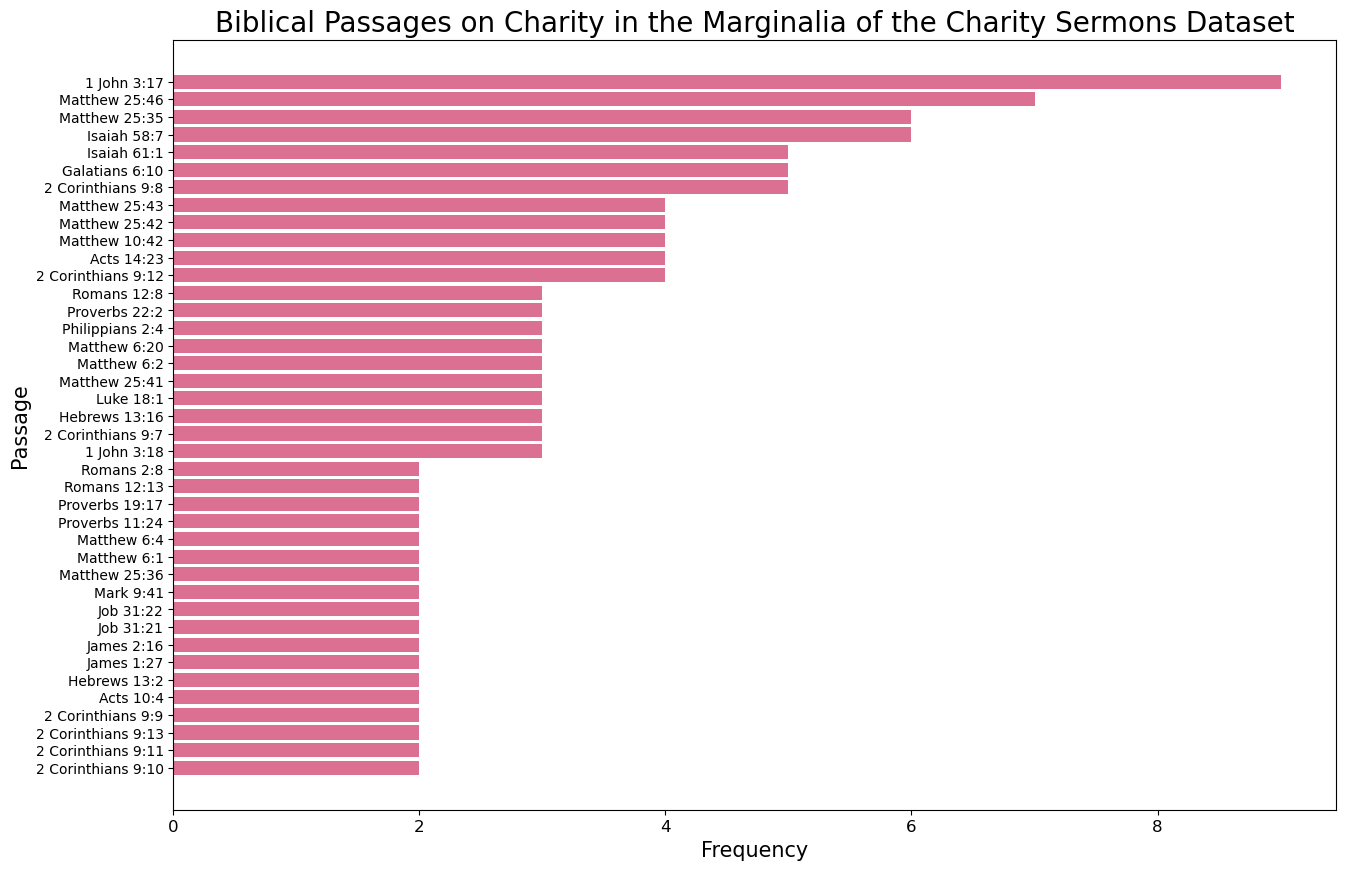

In [9]:
all_charity = []
for c_list in charity_margin.values():
    all_charity.extend(c_list)
print(f'There are {len(all_charity)} citations of charity-related passages.')
charity_counts = dict(Counter(all_charity))
print('Lines cited only once: ', [line for line, freq in charity_counts.items() if freq == 1])
charity_counts = sorted([(line, freq) for line, freq in charity_counts.items() if freq > 1],key=lambda k: (k[1], k[0]))
x,y = [],[]
for word,freq in charity_counts: 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Biblical Passages on Charity in the Marginalia of the Charity Sermons Dataset','palevioletred',('Frequency','Passage'))